<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/logistic_regression_3_performance_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 15), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (49/49), done.
/content/Machine-Learning


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
# Learnig curve in sklearn is the old version
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
# rather than giving df, columns > df.Gender for one series of the column
# in this way the place of columns doesn't chane
df.Gender = pd.get_dummies(df.Gender, drop_first=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
X = df.to_numpy()

In [7]:
# random arrange
print(X.shape[0])
np.random.permutation(5)

400


array([2, 3, 1, 4, 0])

In [8]:
# now we want to shuffle the data > change the place of rows > change the indexes
np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

######################################
# 2. inplace changes occur
np.random.shuffle(X)

In [9]:
y = X[:, -1]
X = X[:, :-1]

In [10]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

# KFold

In [11]:
data_split = KFold(n_splits=5)
data_split

# data_split.split() > returns tuple > (train_inx, val_inx)

KFold(n_splits=5, random_state=None, shuffle=False)

In [12]:
# this should be x and y train
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    print(len(train_inx), len(val_idx))
    clf = LogisticRegression()
    clf.fit(X[train_inx], y[train_inx])
    print('train acc =', clf.score(X[train_inx], y[train_inx]), 
          '\tval acc =', clf.score(X[val_idx], y[val_idx]))
    train_score += clf.score(X[train_inx], y[train_inx])
    val_score += clf.score(X[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

'''
we can see the different outputs > decide better overfit or not > the model is ok
because in each shuffle maybe we choose the simpler data as train and harder data for validation
so with one time of training we can't for sure conclude
'''

320 80
train acc = 0.84375 	val acc = 0.8875
320 80
train acc = 0.84375 	val acc = 0.85
320 80
train acc = 0.840625 	val acc = 0.85
320 80
train acc = 0.85 	val acc = 0.75
320 80
train acc = 0.840625 	val acc = 0.8875
the train score average 0.84375
the validation score average 0.845


"\nwe can see the different outputs > decide better overfit or not > the model is ok\nbecause in each shuffle maybe we choose the simpler data as train and harder data for validation\nso with one time of training we can't for sure conclude\n"

In [21]:
'''
we want to overfit the model
for having polynomial features > 1. hstack(X,X**2,X**3) 2. Polynomial

x = np.arange(-10, 30, 1).reshape(-1, 1)
x_6 = np.hstack((x,x**2,x**3,x**4,x**5,x**6)) > just these degrees

polynomial > creates all of the sentences up to degree n > from 0 to n
form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
abc > 1 a b c a2 b2 c2 ab bc ac a3 b3 c3 abc a2b a2c b2c c2a c2b abc > 20
'''
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=6)
# fit > train/adjust
# transfrom > predict
# fit_transform > fit + predict > the input of all of the functions are based on the type whether they need y or not > if needed we have to pass the y too
X_poly = polynomial.fit_transform(X)
print(X.shape,X_poly.shape)

(400, 3) (400, 84)


In [22]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    print(len(train_inx), len(val_idx))
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_poly[train_inx], y[train_inx])
    print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
          '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

# 1 or 2 percentage error is ok but more than that is not
# train = 90 and validation = 90 is ok > how to know whether your model is overfitting > train acc + validation acc

320 80
train acc = 0.925 	val acc = 0.8875
320 80
train acc = 0.925 	val acc = 0.8875
320 80
train acc = 0.93125 	val acc = 0.8625
320 80
train acc = 0.925 	val acc = 0.9
320 80
train acc = 0.925 	val acc = 0.8875
the train score average 0.9262499999999999
the validation score average 0.885


In [42]:
# now we have overfitted model > we can solve it by adding regularization
# they use regularization by default > l2 and c=1 > in log reg > 1/c 

train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=10000, C=100) # more overfit
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.9418749999999999
the validation score average 0.8550000000000001


In [45]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=1000, C=5e-5) # underfit model
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.759375
the validation score average 0.7550000000000001


In [47]:
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=1000, C=0.03) # more overfit
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

the train score average 0.8987499999999999
the validation score average 0.8800000000000001


In [48]:
'''
the penalty parameter in the function > we have only l2 > C > 1/C > solver: lbfgs
the penalty l1 > change the solver
use lasso regression for l1
GD > j=j-alpha*derivative
solvers > Each solver tries to find the parameter weights that minimize a cost function.
j'=j+alpha*(Wi**2)
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
'''
train_score = 0
val_score = 0
for train_inx, val_idx in data_split.split(X, y):
    clf = LogisticRegression(max_iter=100, penalty='l1', solver="saga", C=0.05) # more overfit
    clf.fit(X_poly[train_inx], y[train_inx])
    # print('train acc =', clf.score(X_poly[train_inx], y[train_inx]), 
    #       '\tval acc =', clf.score(X_poly[val_idx], y[val_idx]))
    train_score += clf.score(X_poly[train_inx], y[train_inx])
    val_score += clf.score(X_poly[val_idx], y[val_idx])

print('the train score average', train_score/data_split.n_splits)
print('the validation score average', val_score/data_split.n_splits)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


the train score average 0.890625
the validation score average 0.8825000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [51]:
C = [.001 , .01, .1, 1 , 10, 100 , 1000]

for c in C:
  train_score = 0
  val_score = 0
  for train_inx, val_idx in data_split.split(X, y):
      clf = LogisticRegression(max_iter=10000, C=c)
      clf.fit(X_poly[train_inx], y[train_inx])
      train_score += clf.score(X_poly[train_inx], y[train_inx])
      val_score += clf.score(X_poly[val_idx], y[val_idx])

  print(f"C is {c}---------")
  print('the train score average', train_score/data_split.n_splits)
  print('the validation score average', val_score/data_split.n_splits)

C is 0.001---------
the train score average 0.8175000000000001
the validation score average 0.8099999999999999
C is 0.01---------
the train score average 0.8856249999999999
the validation score average 0.865
C is 0.1---------
the train score average 0.909375
the validation score average 0.8724999999999999
C is 1---------
the train score average 0.9262499999999999
the validation score average 0.885
C is 10---------
the train score average 0.9337500000000001
the validation score average 0.8674999999999999
C is 100---------
the train score average 0.9418749999999999
the validation score average 0.8550000000000001
C is 1000---------
the train score average 0.946875
the validation score average 0.8474999999999999


# train test split

In [ ]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
clf = LogisticRegression(verbose=1, class_weight='balanced')

In [ ]:
clf.fit(X_train, y_train)

[LibLinear]

/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

# Accuracy

In [ ]:
print('test score:', clf.score(X_test, y_test))
print('test score:', clf.score(X_train, y_train))

test score: 0.8125
test score: 0.85625


In [ ]:
h_train = clf.predict(X_train)
print('ACC =', np.mean(h_train == y_train))

ACC = 0.85625


In [ ]:
accuracy_score(y_train, h_train)

0.85625

# Precision

In [ ]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test precision:', precision_score(y_test, h_test))
print('train precision:', precision_score(y_train, h_train))

test precision: 0.6333333333333333
train precision: 0.7936507936507936


# Recall

In [ ]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test recall:', recall_score(y_test, h_test))
print('train recall:', recall_score(y_train, h_train))

test recall: 0.8260869565217391
train recall: 0.8333333333333334


In [ ]:
print('Test:')
print('\ttrue positive', np.sum((y_test == 1)*(h_test == 1)))
print('\tfalse positive', np.sum((y_test == 0)*(h_test == 1)))
print('\tfalse negative', np.sum((y_test == 1)*(h_test == 0)))
print('\ttrue negative', np.sum((y_test == 0)*(h_test == 0)))
print('Train:')
print('\ttrue positive', np.sum((y_train == 1)*(h_train == 1)))
print('\tfalse positive', np.sum((y_train == 0)*(h_train == 1)))
print('\tfalse negative', np.sum((y_train == 1)*(h_train == 0)))
print('\ttrue negative', np.sum((y_train == 0)*(h_train == 0)))

Test:
	true positive 19
	false positive 11
	false negative 4
	true negative 46
Train:
	true positive 100
	false positive 26
	false negative 20
	true negative 174


# F1-score

In [ ]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test f1-score:', f1_score(y_test, h_test))
print('train f1-score:', f1_score(y_train, h_train))

test f1-score: 0.7169811320754716
train f1-score: 0.8130081300813008


# ROC - AUC

In [ ]:
h_test = clf.predict_proba(X_test)[:, 1]

print('test ROC-AUC:', roc_auc_score(y_test, h_test))
print('train ROC-AUC:', roc_auc_score(y_train, h_train))

test ROC-AUC: 0.889397406559878
train ROC-AUC: 0.8516666666666668


In [ ]:
models = [LogisticRegression(class_weight='balanced'), LogisticRegression()]

for model in models:
    model.fit(X_train, y_train)
    h_test = model.predict_proba(X_test)[:, 1]
    
    print(roc_auc_score(y_test, h_test))

0.889397406559878
0.889397406559878


/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
p_test = model.predict_proba(X_test)[:, 1]

th = 0.5
h_test = (p_test > th)
print('ACC =', np.mean(h_test == y_test))

ACC = 0.8


In [ ]:
clf = LogisticRegression(class_weight='balanced')

train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5)

/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mqod/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

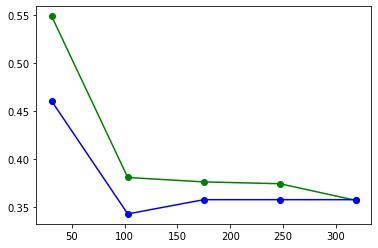

In [ ]:
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')